# Numerical Computing with Numpy
---------
Numpy is so popular data analysis package of python. As you know that Python generally is good choice wherever there is data. Right now, I put on  a file related how to use numpy.

In [1]:
import numpy as np

## Arrays

In [2]:
array_1 = np.array([0, 1, 2, 3])

In [3]:
print(array_1)

[0 1 2 3]


In [4]:
print(type(array_1))

<class 'numpy.ndarray'>


Just like lists, Numpy arrays supports the indexing notation [ ]

In [5]:
array_1[1]

1

In [6]:
array_1[2]

2

## Operating on Numpy Arrays

In [7]:
arr1 = np.array([1, 2, 3, 4])
arr2 = np.array([5, 6, 7, 8])

In [8]:
arr1 * arr2

array([ 5, 12, 21, 32])

In [9]:
arr1 / arr2

array([0.2       , 0.33333333, 0.42857143, 0.5       ])

In [10]:
arr1 + arr2

array([ 6,  8, 10, 12])

In [11]:
arr1 - arr2

array([-4, -4, -4, -4])

In [12]:
arr1 ** 3

array([ 1,  8, 27, 64], dtype=int32)

In [13]:
arr1.max()

4

In [14]:
arr2.min()

5

In [15]:
arr2.sum()

26

## Multi-Dimensional Numpy Arrays

We can now go one step further, and represent the climate data for all the regions together using a single 2-dimensional Numpy arrays

In [16]:
climate_data = np.array([[0, 1, 2, 3],
                        [4, 5, 6, 7], 
                        [8, 9, 10, 11], 
                        [12, 13, 14, 15]])

In [17]:
print(climate_data)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]


If you'have taken a linear algebra class in high school, you might recognize the above 2-d arrays as a matrix with 5 rows (one for each region) and 3 columns (containing values of temperature, rainfall, humidity.

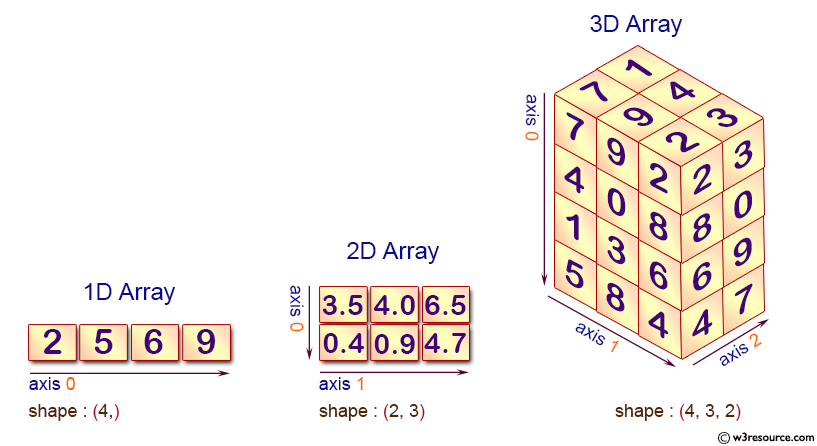

Numpy arrays can have any number of dimensions, and different lenghts alonge each dimension. We can inspect the lenght alone each dinemsion using the **.shape** property of that arrays.

In [18]:
climate_data

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [19]:
climate_data.shape

(4, 4)

In [20]:
arr3 = np.array([[[100, 101, 102, 103], 
                 [104, 105, 106, 107], 
                 [108, 109, 110, 111], 
                 [112, 113, 114, 115]], 
                
                [[116, 117, 118, 119], 
                [200, 201, 202, 203], 
                [204, 205, 206, 207], 
                [208, 209, 210, 211]]])

In [21]:
arr3

array([[[100, 101, 102, 103],
        [104, 105, 106, 107],
        [108, 109, 110, 111],
        [112, 113, 114, 115]],

       [[116, 117, 118, 119],
        [200, 201, 202, 203],
        [204, 205, 206, 207],
        [208, 209, 210, 211]]])

In [22]:
arr3.shape

(2, 4, 4)

All the elements in a numpy array have the datatype. You can check the data type of an array using the **.dtype** property.

In [23]:
print(arr3.dtype)

int32


We can use the **np.matmul** function from Numpy to perform matrix multiplication.

In [24]:
climate_data

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [25]:
climate_data.shape

(4, 4)

In [26]:
weights = np.array([[11], 
                   [22], 
                   [33], 
                   [44]])

In [27]:
weights.shape

(4, 1)

In [28]:
np.matmul(climate_data, weights)

array([[ 220],
       [ 660],
       [1100],
       [1540]])

## Working with CSV File

Numpy also provides helper functions reading & writing to files. Let's download a file **climate_txt**
which contains 10.000 climate data (temperature, humidity, rainfall etc.)

In [29]:
import urllib.request

In [30]:
urllib.request.urlretrieve("https://hub.jovian.ml/wp-content/uploads/2020/08/climate.csv", 
                          "climate.txt")

('climate.txt', <http.client.HTTPMessage at 0x1e783009670>)

In [31]:
climate_datas = np.genfromtxt("climate.txt", delimiter = ",", skip_header = 1)

In [32]:
climate_datas

array([[25., 76., 99.],
       [39., 65., 70.],
       [59., 45., 77.],
       ...,
       [99., 62., 58.],
       [70., 71., 91.],
       [92., 39., 76.]])

In [33]:
climate_datas.shape

(10000, 3)

In [34]:
weight = np.array([1, 2, 3])

In [35]:
yields = np.matmul(climate_datas, weight)

In [36]:
yields

array([474., 379., 380., ..., 397., 485., 398.])

In [37]:
yields.shape

(10000,)

We can now add the **yields** back to **climate_data** as a fourth column using the **np.concatenate** function.

In [38]:
climate_results = np.concatenate((climate_datas, yields.reshape(10000, 1)), axis = 1)

In [39]:
climate_results

array([[ 25.,  76.,  99., 474.],
       [ 39.,  65.,  70., 379.],
       [ 59.,  45.,  77., 380.],
       ...,
       [ 99.,  62.,  58., 397.],
       [ 70.,  71.,  91., 485.],
       [ 92.,  39.,  76., 398.]])

In [40]:
climate_results.shape

(10000, 4)

There are a couple of subtieties here:

+ We need to provide to **axis** argument to **np.concatenate** to specify the dimension along with concatenation should be performed.
+ The arrays being concatenated should have the same number of dimensions, and the same lenght along each dimension, except the one along which concatenation is being performed. We use the **np.reshape** function here to change the shape of **yields** from (**10000,**) to (**10000, 1**).

Here is a visual eplanation of **np.concatenate** along **axis = 1** 

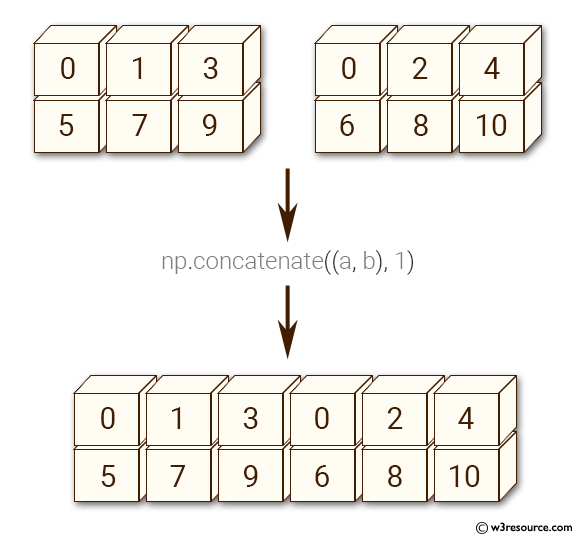

The best way to understand what a Numpy fuction does is to expreiment with it and read the documantion using the **help** fuction to learn about its argument & return values. Use the cells below to experiment with **np.concatenate** and **np.reshape**.

Let's write the final results from our computation above to a file using the **np.savetxt** function.

In [41]:
climate_results

array([[ 25.,  76.,  99., 474.],
       [ 39.,  65.,  70., 379.],
       [ 59.,  45.,  77., 380.],
       ...,
       [ 99.,  62.,  58., 397.],
       [ 70.,  71.,  91., 485.],
       [ 92.,  39.,  76., 398.]])

In [42]:
np.savetxt("climate_results.txt", 
           climate_results, 
           fmt = "%.2f", 
           header = "temperature, rainfall, humudity, yeild_apples", 
           comments = "")

Numpy provides hundreds of functions for performing operations on arrays. Here are some common functions:

+ Mathematics: **np.sum**, **np.exp**, **np.round**. arithematic operations
+ Array manipulation: **np.reshape**, **np.stack**, **np.concatenate**, **np.split**
+ Linear Algebra: **np.matmup**, **np.dot**, **np.transpose**, **np.eigvals**
+ Statistics: **np.mean**, **np.median**, **np.std**, **np.max**, **np.min**

You can find a full list of arrray functions here: https://numpy.org/doc/stable/reference/routines.html

## Arithmetic Operations and Broadcasting

Numpy arrays support arithmetic operations like **+**, **-**, * etc. You can perform an arithmetic opertion with a signal number (also called scaler), op with another array of the same shape. This makes it really easy to write mathemtical expressions with multi-dimensional arrays.

In [46]:
array_1 = np.array([[1, 2, 3, 4], 
                   [5, 6, 7, 8], 
                   [9, 0, 1, 2]])

In [47]:
array_2 = np.array([[11, 22, 33, 44], 
                    [55, 66, 77, 88], 
                    [99, 111, 222, 333]])

In [48]:
array_2 + 11

array([[ 22,  33,  44,  55],
       [ 66,  77,  88,  99],
       [110, 122, 233, 344]])

In [49]:
array_2 / 11

array([[ 1.        ,  2.        ,  3.        ,  4.        ],
       [ 5.        ,  6.        ,  7.        ,  8.        ],
       [ 9.        , 10.09090909, 20.18181818, 30.27272727]])

In [50]:
array_1 * 10

array([[10, 20, 30, 40],
       [50, 60, 70, 80],
       [90,  0, 10, 20]])

In [51]:
array_1 / 5

array([[0.2, 0.4, 0.6, 0.8],
       [1. , 1.2, 1.4, 1.6],
       [1.8, 0. , 0.2, 0.4]])

In [53]:
array_2 % 2

array([[1, 0, 1, 0],
       [1, 0, 1, 0],
       [1, 1, 0, 1]], dtype=int32)

In [54]:
array_1 / array_2

array([[0.09090909, 0.09090909, 0.09090909, 0.09090909],
       [0.09090909, 0.09090909, 0.09090909, 0.09090909],
       [0.09090909, 0.        , 0.0045045 , 0.00600601]])

In [55]:
array_1 * array_2

array([[ 11,  44,  99, 176],
       [275, 396, 539, 704],
       [891,   0, 222, 666]])

Numpy arrays also support **broadcasting**, which allows arthmetic operations between two array having a different number of dimensions, but compatible shapes. Let's look at an example to see how it works.

In [56]:
array_3 = np.array([[11, 22, 33], 
                    [44, 55, 66], 
                    [77, 88, 99]])

In [57]:
array_3.shape

(3, 3)

In [59]:
array_4 = np.array([111, 222, 333])

In [61]:
array_4.shape

(3,)

In [62]:
array_3 + array_4

array([[122, 244, 366],
       [155, 277, 399],
       [188, 310, 432]])

In [63]:
array_3 == array_4

array([[False, False, False],
       [False, False, False],
       [False, False, False]])

In [64]:
array_4 > array_3

array([[ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True]])

In [65]:
(array_4 > array_3).sum()

9

## Array Indexing and Slicing

Numpy extends Python's list indexing notation using [] to multiple dimensions in a fairly intutive fashion. You can provide a comma seperated list of indices or ranges to select a specific element or a subarray (also called slice) from a numpy array.

In [66]:
array_5 = np.array([
    [[11, 12, 13, 14], 
     [13, 14, 15, 19]], 
    
    [[15, 16, 17, 21], 
     [63, 92, 36, 18]], 
    
    [[98, 32, 81, 23], 
     [17, 18, 19.5, 43]]
])

In [67]:
array_5.shape

(3, 2, 4)

In [69]:
array_5[0, 0, 0]

11.0

In [70]:
array_5[2, 1, 3]

43.0

In [71]:
array_5[1:2, 0:2, 0:2]

array([[[15., 16.],
        [63., 92.]]])

In [72]:
array_5[1]

array([[15., 16., 17., 21.],
       [63., 92., 36., 18.]])

In [73]:
array_5[2, 1]

array([17. , 18. , 19.5, 43. ])

## Other Ways of Creating Numpy Arrays

Numpy also provides some handly functions to create arrays of a desired shape with fixed or random values. Check the out the official documentation or use the **help** function to learn more about the following functions.

In [76]:
np.zeros((10, 10))

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [77]:
np.ones((10, 10))

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])

In [79]:
np.eye(10)

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [85]:
np.random.rand(4, 4)

array([[0.80398028, 0.31259219, 0.87411369, 0.29723166],
       [0.58426851, 0.38725748, 0.78599042, 0.12146416],
       [0.89208261, 0.25859021, 0.91885085, 0.24813418],
       [0.99933129, 0.97519411, 0.15001774, 0.3186729 ]])

In [88]:
np.random.randn(3, 3)

array([[ 0.8991517 ,  0.36839808,  0.46570395],
       [ 1.4240837 , -0.96856659, -0.24586435],
       [-0.6813867 ,  1.71770519,  0.07483703]])

In [89]:
np.full([5, 5], 10)

array([[10, 10, 10, 10, 10],
       [10, 10, 10, 10, 10],
       [10, 10, 10, 10, 10],
       [10, 10, 10, 10, 10],
       [10, 10, 10, 10, 10]])

In [97]:
np.arange(1, 11).reshape(2, 5)

array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10]])

In [93]:
np.arange(1, 11, 2)

array([1, 3, 5, 7, 9])

In [94]:
np.linspace(3, 27, 9)

array([ 3.,  6.,  9., 12., 15., 18., 21., 24., 27.])